In [372]:
import pandas as pd 
import seaborn as sns 
from datetime import datetime
import numpy as np

In [373]:
df = pd.read_csv('Social_Network_Ads.csv')

In [374]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [375]:
df.drop(['User ID'],axis = 1 , inplace=True)

In [376]:
df.drop_duplicates(inplace=True , ignore_index=True)

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           380 non-null    object
 1   Age              380 non-null    int64 
 2   EstimatedSalary  380 non-null    int64 
 3   Purchased        380 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.0+ KB


In [378]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [379]:
df['Gender'].value_counts()

Female    198
Male      182
Name: Gender, dtype: int64

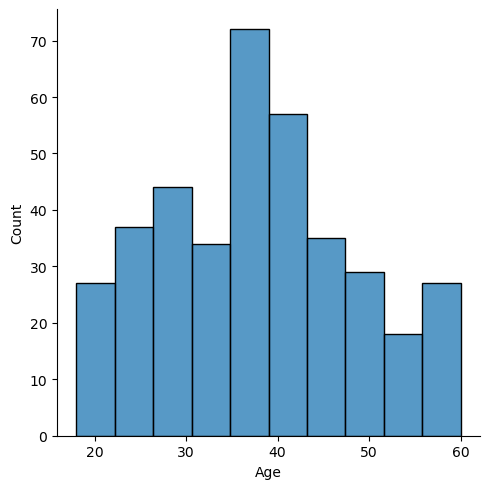

In [380]:
sns.displot(data = df , x='Age')

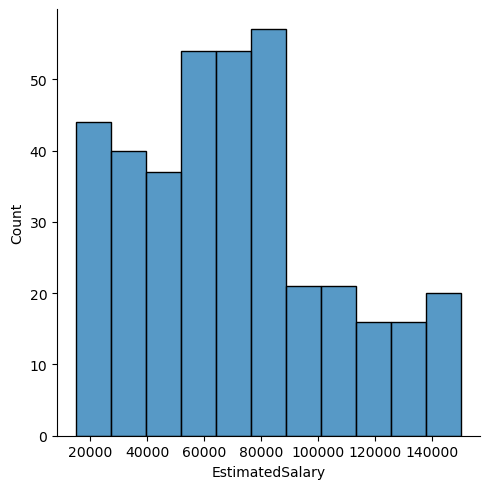

In [381]:
sns.displot(data = df , x='EstimatedSalary')

In [382]:
df['Purchased'].value_counts(normalize=True)

0    0.631579
1    0.368421
Name: Purchased, dtype: float64

In [383]:
#from sklearn.preprocessing import OneHotEncoder

In [384]:
#encoder = OneHotEncoder(sparse=False,drop="first")

In [385]:
#transformed_col = encoder.fit_transform(df[['Gender']])

In [386]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == 'Male' else 0)

In [387]:
#transformed_df = pd.DataFrame(transformed_col , columns=encoder.get_feature_names_out())

In [388]:
#df = pd.concat([df , transformed_df] , axis = 1)

In [389]:
#df.drop('Gender' , axis =1 , inplace=True)

In [390]:
from sklearn.model_selection import train_test_split

In [463]:
x=df.drop(['Purchased'] , axis =1)
y=df['Purchased']

In [464]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=7 , test_size=0.15,  stratify=y , shuffle=True)

In [465]:
from sklearn.preprocessing import StandardScaler

In [466]:
scaler = StandardScaler()

In [467]:
col_to_be_scaled = ['EstimatedSalary' , 'Age']

In [468]:
x_train[col_to_be_scaled]=scaler.fit_transform(x_train[col_to_be_scaled])

In [469]:
x_test[col_to_be_scaled] = scaler.transform(x_test[col_to_be_scaled])

In [470]:
from imblearn.under_sampling import RandomUnderSampler

In [471]:
sm = RandomUnderSampler()

In [472]:
x_train , y_train = sm.fit_resample(x_train,y_train)

In [473]:
from sklearn.linear_model import LogisticRegression

In [474]:
model = LogisticRegression()

In [475]:
x_train

,Gender,Age,EstimatedSalary
0,0,-1.088384,-1.618593
1,0,-0.317445,0.037142
2,1,0.260759,-0.340482
3,1,1.128065,-0.166194
4,1,0.453493,-0.485722
...,...,...,...
233,1,0.838963,0.501909
234,1,-0.028343,2.128596
235,0,2.091738,0.501909
236,1,0.935330,-1.473353


In [476]:
model.fit(x_train , y_train)

LogisticRegression()

In [477]:
y_pred = model.predict(x_test)

In [478]:
from sklearn.metrics import accuracy_score 

In [479]:
accuracy_score(y_test , y_pred)

0.8771929824561403

In [480]:
accuracy_score(y_train , model.predict(x_train))

0.8235294117647058